### Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Titanic Dataset


### Read the data


In [7]:
df = pd.read_csv("titanic_modified_dataset.csv", index_col="PassengerId")
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


### Extract the features and labels


In [12]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

# add a bias column to the dataset
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

# Split the dataset into training and testing sets
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffled = True
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y, test_size=val_size, random_state=random_state, shuffle=is_shuffled
)
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffled,
)


### Normalize the features


In [13]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])
print(f"Traing set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Traing set shape: (623, 9), (623,)
Validation set shape: (179, 9), (179,)
Testing set shape: (89, 9), (89,)


### Logistic regression


In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat


def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

    loss = -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)
    return loss.mean()


def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size


def update_theta(theta, gradient, lr):
    return theta - lr * gradient


def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = np.mean(y_hat == y)
    return acc

In [15]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=(X_train.shape[1],))

train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i : i + batch_size]
        y_i = y_train[i : i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(
        f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\t Validation loss: {val_batch_loss:.3f}"
    )


EPOCH 1:	Training loss: 0.703	 Validation loss: 0.599

EPOCH 2:	Training loss: 0.670	 Validation loss: 0.582

EPOCH 3:	Training loss: 0.640	 Validation loss: 0.567

EPOCH 4:	Training loss: 0.614	 Validation loss: 0.555

EPOCH 5:	Training loss: 0.592	 Validation loss: 0.544

EPOCH 6:	Training loss: 0.572	 Validation loss: 0.535

EPOCH 7:	Training loss: 0.554	 Validation loss: 0.528

EPOCH 8:	Training loss: 0.539	 Validation loss: 0.522

EPOCH 9:	Training loss: 0.526	 Validation loss: 0.517

EPOCH 10:	Training loss: 0.514	 Validation loss: 0.513

EPOCH 11:	Training loss: 0.504	 Validation loss: 0.509

EPOCH 12:	Training loss: 0.495	 Validation loss: 0.507

EPOCH 13:	Training loss: 0.487	 Validation loss: 0.505

EPOCH 14:	Training loss: 0.480	 Validation loss: 0.503

EPOCH 15:	Training loss: 0.474	 Validation loss: 0.502

EPOCH 16:	Training loss: 0.468	 Validation loss: 0.501

EPOCH 17:	Training loss: 0.463	 Validation loss: 0.500

EPOCH 18:	Training loss: 0.459	 Validation loss: 0.500



In [18]:
len(train_losses), len(val_losses), len(train_accs), len(val_accs)

(100, 100, 100, 100)

### Visualize the results


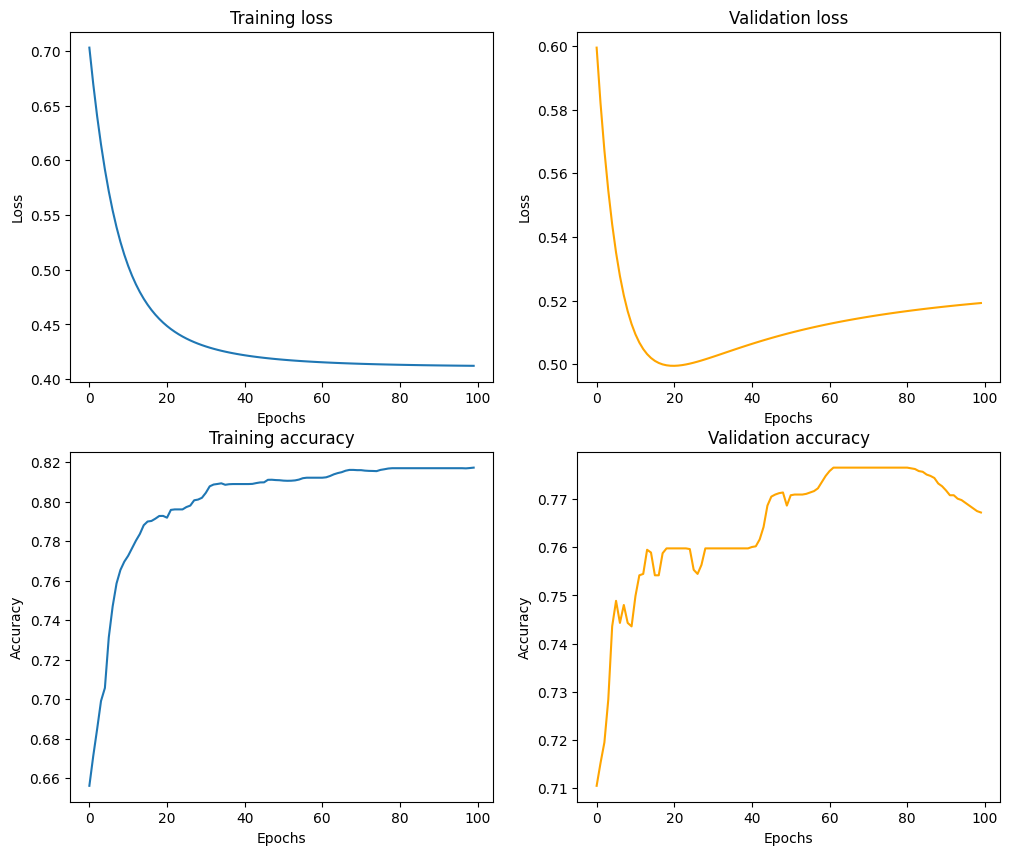

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")

ax[0, 1].plot(val_losses, "orange")
ax[0, 1].set(xlabel="Epochs", ylabel="Loss", title="Validation loss")

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")

ax[1, 1].plot(val_accs, "orange")
ax[1, 1].set(xlabel="Epochs", ylabel="Accuracy", title="Validation accuracy")

plt.show()

### Evaluate on the test set


In [22]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print(f"Accuracy on the validation set: {val_set_acc:.3f}")
print(f"Accuracy on the test set: {test_set_acc:.3f}")

Accuracy on the validation set: 0.771
Accuracy on the test set: 0.775


## Twitter Sentiment Analysis


In [25]:
import nltk
import re
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

### Read data


In [24]:
df = pd.read_csv("sentiment_analysis.csv", index_col="id")
df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


### Preprocess data


In [ ]:
def text_normalize(text):
    # retweet old acronym "RT" removal
    text = re.sub(r"^RT[\s]+", "", text)

    # remove hyperlinks
    text = re.sub(r"https?:\/\/.*[\r\n]*", "", text)

    # remove hashtags
    text = re.sub(r"#", "", text)

    # tokenize the text
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(text)
    return tokens


def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row["tweet"]
        label = row["label"]
        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs


def get_feature(text, freqs):
    token = text_normalize(text)
    X = np.zeros(3)
    X[0] = 1

    for token in token:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X


In [ ]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row["tweet"]
    label = row["label"]

    X_i = get_feature(tweet, freqs)
    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(7920, 3) (7920,)


In [29]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffled = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=val_size, random_state=random_state, shuffle=is_shuffled
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffled,
)

normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])
print(f"Traing set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Traing set shape: (5544, 3), (5544,)
Validation set shape: (1584, 3), (1584,)
Testing set shape: (792, 3), (792,)


### Logistic regression


In [30]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size=(X_train.shape[1],))

train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i : i + batch_size]
        y_i = y_train[i : i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(
        f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\t Validation loss: {val_batch_loss:.3f}"
    )


EPOCH 1:	Training loss: 0.713	 Validation loss: 0.713

EPOCH 2:	Training loss: 0.668	 Validation loss: 0.669

EPOCH 3:	Training loss: 0.631	 Validation loss: 0.632

EPOCH 4:	Training loss: 0.601	 Validation loss: 0.602

EPOCH 5:	Training loss: 0.576	 Validation loss: 0.577

EPOCH 6:	Training loss: 0.556	 Validation loss: 0.556

EPOCH 7:	Training loss: 0.539	 Validation loss: 0.539

EPOCH 8:	Training loss: 0.524	 Validation loss: 0.524

EPOCH 9:	Training loss: 0.512	 Validation loss: 0.512

EPOCH 10:	Training loss: 0.502	 Validation loss: 0.502

EPOCH 11:	Training loss: 0.493	 Validation loss: 0.493

EPOCH 12:	Training loss: 0.485	 Validation loss: 0.485

EPOCH 13:	Training loss: 0.479	 Validation loss: 0.478

EPOCH 14:	Training loss: 0.473	 Validation loss: 0.473

EPOCH 15:	Training loss: 0.468	 Validation loss: 0.467

EPOCH 16:	Training loss: 0.464	 Validation loss: 0.463

EPOCH 17:	Training loss: 0.460	 Validation loss: 0.459

EPOCH 18:	Training loss: 0.456	 Validation loss: 0.455



### Visualize the results


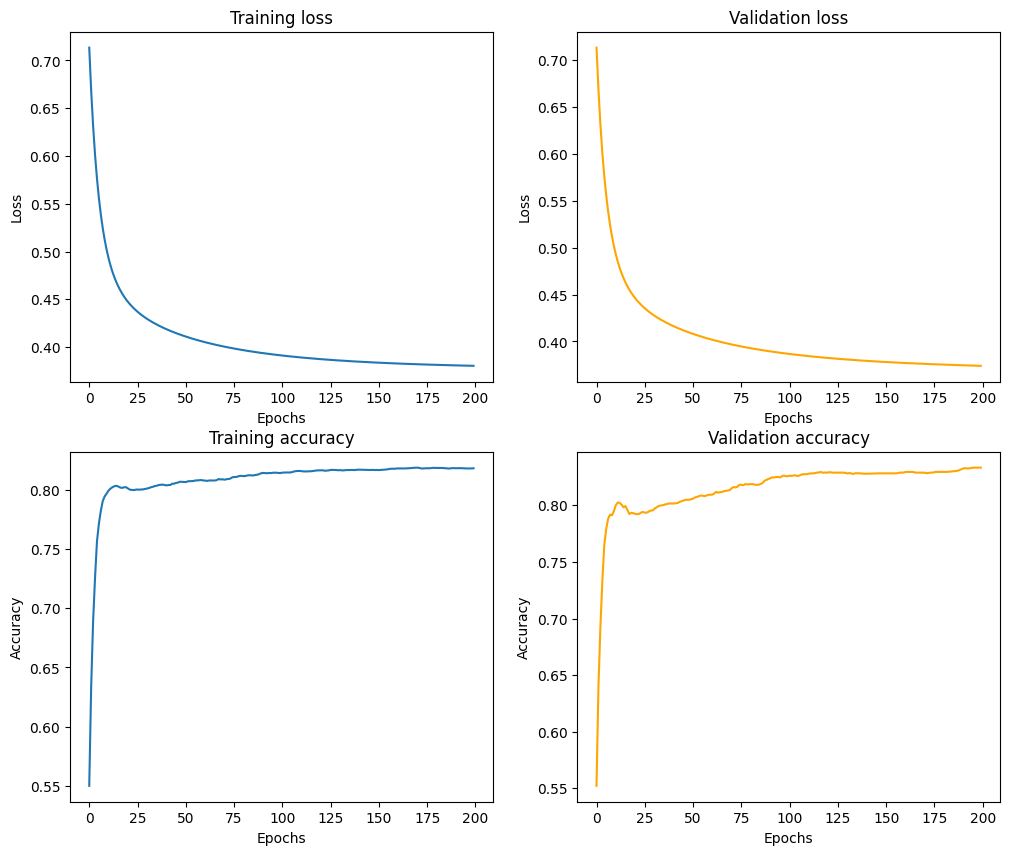

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")

ax[0, 1].plot(val_losses, "orange")
ax[0, 1].set(xlabel="Epochs", ylabel="Loss", title="Validation loss")

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")

ax[1, 1].plot(val_accs, "orange")
ax[1, 1].set(xlabel="Epochs", ylabel="Accuracy", title="Validation accuracy")

plt.show()

In [32]:
vak_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print(f"Accuracy on the validation set: {val_set_acc:.3f}")
print(f"Accuracy on the test set: {test_set_acc:.3f}")

Accuracy on the validation set: 0.771
Accuracy on the test set: 0.836
